# Popularly-booked AirBNB Bangkok Listings Data Analysis
A Data Analysis Study Case Project focused on the accommodations popularity based on its 1-year future availability and past reviews metrics. 

## Background
AirBNB is an online marketplace broker for short and long-term homestays and experiences in various countries and regions, including Bangkok, Thailand's magnificent capital city, which always buzzing with tourists around the world. 

## Problem Questions
AirBNB Bangkok Headquarters wants to know **accommodations with the most demand** (1 year) to adjust its marketing strategy and help increase annual revenue. 

**What's the most popular accommodation amongst AirBNB Bangkok listings (the most fully booked throughout the next year)?**

Other than the scarcity of the listings `availability` (booked days), the popularity of a listing property could also be defined by the `reviews`. Generally, popular items tend to have more and newer reviews. Hence we will see if the availability of the accommodations correlates with their reviews and see if **the listings booking demand associated with those review parameters**. 

- Acknowledgement: This project is initially created for the Capstone Project of Module 2 on Purwadhika Digital School Data Science Bootcamp purposes. 
- Created by Qonita Shobrina


# Capstone Module 2 - Data Analysis
by Qonita Shobrina

## **Background**

AirBNB is an online marketplace broker for short and long-term homestays and experiences in various countries and regions, including Bangkok, Thailand's magnificent capital city, which always buzzing with tourists around the world. 


## Problem Statement
AirBNB Bangkok Headquarters wants to know **accommodations with the most demand** (1 year) to adjust its marketing strategy and help increase annual revenue. 

**What's the most popular accommodation amongst AirBNB Bangkok listings (the most fully booked throughout the next year)?**

# **Data**

To answer the problem questions, we need to analyse the [provided data](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF). 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import folium

import warnings
warnings.filterwarnings("ignore")

In [37]:
# read and define data
df = pd.read_csv('Airbnb Listings Bangkok.csv', index_col=0)
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


This dataset contains the information of AirBNB Bangkok listing accommodations' information related to the general details, location, price, and customer bookings and reviews history. The informations are detailed in 16 columns:
- id : Airbnb's unique identifier for the listing.
- name : Name of the listing accommodation. 
- host_id : Airbnb's unique identifier for the host/user.
- host_name : Name of the host. Usually, just the first name(s).
- neighborhood : The geocoded location's neighborhood name.
- latitude : The location latitude coordinate (WGS84)
- longitude : The location longitude coordinate (WGS84)
- room_type : The listing accommodation's rented space type (entire place/private room/shared room/hotel room).
- price : Daily price in local currency (the $ sign may be used
despite the locale). 
- minimum_nights : The minimum number of night stays for the listing (calendar
rules may differ).
- number_of_reviews : The number of reviews the listing has.
- last_reviews : The date of the last/newest review.
- reviews_per_month : The average review per month (within the last 12 months).
- calculated_host_listings_count : The number of listings the host has in the current scrape in the city/region geography.
- availability_365 : Days of availability of the listing in the future (within the next 365 days).
- number_of_reviews_ltm : The number of reviews the listing has (within the last 12 months).


## Data Understanding & Cleaning

Before analysing the data, we need to make sure that the data are clean and ready. Foregone data understanding is vital to set the appropriate method for data cleaning. 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               10064

In [39]:
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [40]:
# columns unique value
pd.set_option('display.max_colwidth', 100)

items = []
for col in df.columns :
    items.append( [col, df[col].nunique(), df[col].unique()])

uniqvalues = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=items)
uniqvalues

,Column Name,Number of Unique,Unique Sample
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 5..."
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bang..."
2,host_id,6659,"[120437, 120541, 123784, 153730, 610315, 2129668, 222005, 7045870, 9181769, 5171292, 263049, 927..."
3,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimonpak, Athitaya, Jiraporn, Nol, Somsak, Tor, Jing, ..."
4,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, Bang Kho laen, Rat Burana, Chatu Chak, Khlong San, ..."
5,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76872, 13.69757, 13.68556, 13.82925, 13.81693, 13.72..."
6,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 100.63338, 100.5288, 100.49535, 100.56737, 100.5643..."
7,room_type,4,"[Entire home/apt, Private room, Hotel room, Shared room]"
8,price,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700, 1150, 1893, 1862, 910, 1400, 4156, 1577, 122594, ..."
9,minimum_nights,86,"[3, 1, 60, 7, 250, 2, 15, 30, 28, 21, 27, 4, 180, 90, 5, 358, 1125, 29, 14, 200, 365, 120, 9, 12..."


**Missing Value**

In [41]:
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [42]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

<Axes: >

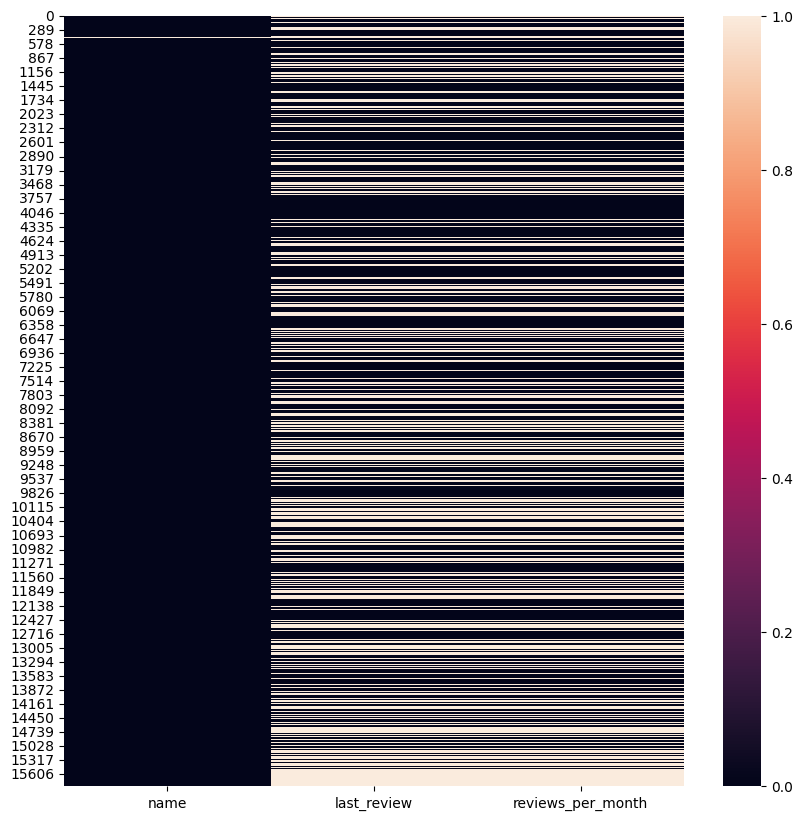

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['name', 'last_review', 'reviews_per_month']].isna())

In [44]:
df_isna = df[df.isna().any(axis=1)]
df_isna

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


**Duplicated Data**

In [45]:
# check duplicated data
df.duplicated().sum()

np.int64(0)

### Raw Data **Summary** & Data Cleaning Method

There's no duplicated row in the data. However there are some missing values within four columns (`name`, `host_name`, `last_review`, and `reviews_per_month`). The missing values could be treated by:
- deleting row/column of with missing values. this is suitable for rows/columns that do not carry any suitable/useful information related to the problem. 
- filling in the missing value. without discarding any data, the missing value can be filled with the actual value (or close to) or any related information. The statistic central tendency number/object (mean, mode, median) are often used to fill in the missing values. 

More details of the columns' missing values and its missing value treatment are as follow: 


#### `name`
there are only 8 missing values out of more than 15k listing. It can be filled with related known information like: `room_type` and `neighborhood`'. 

In [46]:
df[df['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [47]:
df.loc[(df['name'].isna()), ['name']] = df['room_type'] + ', ' + df['neighbourhood']

#  check if data has been filled
df.iloc[[1030]]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1030,8055144,"Private room, Vadhana",42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0


#### `host_name`
There is only 1 missing value. It can be filled with a default/general name for the property holder as 'Host'.


In [48]:
df[df['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [49]:
df.loc[(df['host_name'].isna()), ['host_name']] = 'Host'

#  check if data has been filled
df.iloc[[3571]]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,Host,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


#### `last_review` and `reviews_per_month`
There are 4 columns in this data that are related to customer review (`number_of_reviews`, `last_reviews`, `reviews_per_month`, `number_of_reviews_ltm`). Let's take a look if the missing values match the other column's data. 

In [50]:
df[(df['host_name'].isna()) | (df['reviews_per_month'].isna())]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [51]:
df[df['last_review'].isna()].describe(include='all')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5.790000e+03,5790,5.790000e+03,5790,5790,5790.000000,5790.000000,5790,5.790000e+03,5790.000000,5790.0,0,0.0,5790.000000,5790.000000,5790.0
unique,NaN,5498,NaN,3121,50,NaN,NaN,4,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
top,NaN,14 Male Dormitory Room,NaN,Pornchai,Vadhana,NaN,NaN,Private room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,13,NaN,57,755,NaN,NaN,2929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.057170e+17,NaN,1.874319e+08,NaN,NaN,13.748725,100.562102,NaN,3.422715e+03,19.426770,0.0,NaN,NaN,8.443351,268.616062,0.0
std,3.271955e+17,NaN,1.421029e+08,NaN,NaN,0.048179,0.059059,NaN,2.115540e+04,62.078493,0.0,NaN,NaN,16.341244,122.208930,0.0
min,2.797900e+04,NaN,7.041300e+04,NaN,NaN,13.527300,100.329550,NaN,0.000000e+00,1.000000,0.0,NaN,NaN,1.000000,0.000000,0.0
25%,2.473563e+07,NaN,5.701520e+07,NaN,NaN,13.719364,100.526505,NaN,9.000000e+02,1.000000,0.0,NaN,NaN,1.000000,179.000000,0.0
50%,3.928426e+07,NaN,1.648318e+08,NaN,NaN,13.740715,100.564040,NaN,1.500000e+03,1.000000,0.0,NaN,NaN,2.000000,353.000000,0.0
75%,6.309042e+17,NaN,2.831239e+08,NaN,NaN,13.766420,100.591815,NaN,2.650000e+03,7.000000,0.0,NaN,NaN,8.000000,365.000000,0.0


In [52]:
df[df['reviews_per_month'].isna()].describe(include='all')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5.790000e+03,5790,5.790000e+03,5790,5790,5790.000000,5790.000000,5790,5.790000e+03,5790.000000,5790.0,0,0.0,5790.000000,5790.000000,5790.0
unique,NaN,5498,NaN,3121,50,NaN,NaN,4,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
top,NaN,14 Male Dormitory Room,NaN,Pornchai,Vadhana,NaN,NaN,Private room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,13,NaN,57,755,NaN,NaN,2929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.057170e+17,NaN,1.874319e+08,NaN,NaN,13.748725,100.562102,NaN,3.422715e+03,19.426770,0.0,NaN,NaN,8.443351,268.616062,0.0
std,3.271955e+17,NaN,1.421029e+08,NaN,NaN,0.048179,0.059059,NaN,2.115540e+04,62.078493,0.0,NaN,NaN,16.341244,122.208930,0.0
min,2.797900e+04,NaN,7.041300e+04,NaN,NaN,13.527300,100.329550,NaN,0.000000e+00,1.000000,0.0,NaN,NaN,1.000000,0.000000,0.0
25%,2.473563e+07,NaN,5.701520e+07,NaN,NaN,13.719364,100.526505,NaN,9.000000e+02,1.000000,0.0,NaN,NaN,1.000000,179.000000,0.0
50%,3.928426e+07,NaN,1.648318e+08,NaN,NaN,13.740715,100.564040,NaN,1.500000e+03,1.000000,0.0,NaN,NaN,2.000000,353.000000,0.0
75%,6.309042e+17,NaN,2.831239e+08,NaN,NaN,13.766420,100.591815,NaN,2.650000e+03,7.000000,0.0,NaN,NaN,8.000000,365.000000,0.0


From the data summary above, every missing values on `last_reviews` and `reviews_per_month` has 0 (zero) or missing value in other review data columns. So we can assume that there's no review received by the listing, hence we can fill the missing values with 0 (zero). 

In [53]:
for column in ['last_review', 'reviews_per_month']:
    df.loc[(df[column].isna()), [column]] = 0

# check if data has been filled
df.iloc[[14]]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.71516,100.56806,Entire home/apt,1400,30,0,0,0.0,1,365,0


In [54]:
# check if there's any missing value left
df[df.isna().any(axis=1)]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


## **Cleaned Data**
As the data have been cleaned and set for the next step (analysis), the final (ready) dataset summary is as follows: 

In [55]:
#  data summary
items = []
for col in df.columns :
    items.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

datasumm = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=items)
print(df.shape)
datasumm

(15854, 16)


,dataFeatures,dataType,null,unique,uniqueSample
0,id,int64,0,15854,"[44924542, 45485860]"
1,name,object,0,14801,"[Cana Mansion Room 316, Escape Condo]"
2,host_id,int64,0,6659,"[245970127, 262165510]"
3,host_name,object,0,5313,"[Awanderer, Pixel]"
4,neighbourhood,object,0,50,"[Samphanthawong, Khan Na Yao]"
5,latitude,float64,0,9606,"[13.70981, 13.73821]"
6,longitude,float64,0,10224,"[100.48019, 100.51564]"
7,room_type,object,0,4,"[Shared room, Private room]"
8,price,int64,0,3040,"[3971, 1764]"
9,minimum_nights,int64,0,86,"[183, 365]"


In total, there are 15854 data of AirBNB listed properties in Bangkok, Thailand. No data has been erased until this process, but all the missing values have been filled using suitable approaches.  

### Saving Cleaned Data
We need to save the cleaned data to differ it from the raw one and for easier handling and usability. 

In [56]:
df.to_csv('AirBNB_Bangkok_cleaned.csv', index = False)

# **Data Analysis**
The initial data now is ready to use, and we may begin to analyse it to answer the problem question: 

**What's the most popular accommodation amongst AirBNB Bangkok listings (the most fully booked throughout the next year)?**

Using this dataset, we can find the most popular and best demanded homestays/properties by its **availability**.

And then with the available data about the listing's reviews we could also identify if the booking popularity is correlated with the number of reviews they have. 

### **Popularity by Booking Days Availability**

Here's the Top 10 listed AirBNB properties in Bangkok based on its available booking days. 
- Note that lower numbers of `availability` days means that a property is more popular in demand to be booked. 

In [57]:
df.sort_values('availability_365').head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5413,27237391,Brand New Suite 60sqm/3Min walk (Nana Station),378180502,Panitchaya,Khlong Toei,13.73911,100.55377,Hotel room,8913,1,2,2019-04-07,0.04,22,0,0
5539,27476933,Deluxe Twin RB · Deluxe Twin RB · Deluxe Twin RB · Deluxe Twin RB · Deluxe Twin RB · Deluxe Twin...,378180502,Panitchaya,Parthum Wan,13.74662,100.54971,Private room,7112,1,1,2019-03-02,0.02,22,0,0
5259,25751259,"限时特价！步行可达EK,碧亚威试管医院全新高品质高景观 2卧2卫2BR 131",119203329,Leona,Huai Khwang,13.75428,100.57665,Entire home/apt,1580,3,83,2020-01-28,1.50,20,0,0
5287,25820143,Large studio 1BR Mid Town Sukhumvit31 @Sif #02,194027349,Kasom,Khlong Toei,13.73359,100.56541,Private room,1456,2,78,2022-12-14,1.41,2,0,11
14322,729626149936269321,"Embassies Area, close to BTS, breakfast included",26620868,Gilles,Khlong Toei,13.73673,100.55583,Entire home/apt,1190,2,1,2022-11-14,0.67,34,0,1
1027,7453764,Upper Sukhumvit Modern Minimal Life,12180406,Kalorin,Vadhana,13.74497,100.57397,Entire home/apt,2127,7,0,0,0.00,1,0,0
8717,37704374,Private House SK93 * feel like stay @ home 中文服务,10688276,Yos,Phra Khanong,13.70171,100.62059,Private room,700,3,0,0,0.00,1,0,0
5333,26928760,Star garden bkk（无边泳池花园房）,166177923,琦琦/Kiki,Din Daeng,13.78385,100.57303,Entire home/apt,3200,4,95,2020-03-02,1.78,3,0,0
8740,37892490,New! La Chada Night Market 1BR 2PPL near MRT,201677068,Curry,Huai Khwang,13.76547,100.58683,Entire home/apt,1057,1,9,2019-12-11,0.22,228,0,0
8742,37893129,New! La Chada Night Market studio 2PPL near MRT,201677068,Curry,Huai Khwang,13.76566,100.58645,Entire home/apt,1000,1,11,2020-02-04,0.27,228,0,0


In [58]:
df['availability_365'].value_counts().head(2)

availability_365
365    2392
0       857
Name: count, dtype: int64

In [59]:
df['availability_365'].value_counts()/df.shape[0]*100

availability_365
365    15.087675
0       5.405576
364     4.251293
180     2.756402
90      2.106724
         ...    
189     0.012615
183     0.012615
193     0.006308
197     0.006308
192     0.006308
Name: count, Length: 366, dtype: float64

In [60]:
df['availability_365'].describe()

count    15854.000000
mean       244.378643
std        125.843224
min          0.000000
25%        138.000000
50%        309.000000
75%        360.000000
max        365.000000
Name: availability_365, dtype: float64

In [61]:
available_0 = df[(df['availability_365'] == 0)].reset_index(drop=True)
available_0

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,1019241,Chic two bedroom for Monthly rental,3323622,Phoebe,Bang Rak,13.726870,100.527250,Entire home/apt,2701,30,104,2020-02-20,0.89,1,0,0
1,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.748140,100.520160,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0
2,527553,"Beautiful Apt @ Ratchayothin BTS, Free Wifi",2592798,Nokina,Chatu Chak,13.828410,100.571030,Entire home/apt,1004,2,24,2018-07-22,0.19,2,0,0
3,1244333,"Private Room@Chatuchak,BTS,JJ market,DMK airport",2087671,Apipu,Phaya Thai,13.792210,100.546310,Private room,399,1,33,2020-03-15,0.78,1,0,0
4,1316688,Contemporary Modern Duplex - Thonglor,5394070,Eva,Khlong Toei,13.722420,100.579620,Entire home/apt,1489,30,81,2022-10-07,0.72,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,779396995711655318,The Inspired Luxury: 1BR/MRT/Pool/JODD Fair,133082557,Jean,Huai Khwang,13.753800,100.574680,Entire home/apt,1400,2,0,0,0.00,19,0,0
853,779434871544801466,The Grand Luxury Suite:2BR 2WC /High Floor/Netflix,133082557,Jean,Huai Khwang,13.759550,100.569950,Entire home/apt,3000,1,0,0,0.00,19,0,0
854,779503507904940932,Cosy Room near MBK Siam Paragon,214984794,Sita,Parthum Wan,13.741934,100.524283,Private room,1879,1,0,0,0.00,10,0,0
855,780301430602562032,Chill Out With Love :1BR WIFI/JOOD Fair/Pool,132745392,Mt,Huai Khwang,13.753780,100.574480,Entire home/apt,1000,2,0,0,0.00,25,0,0


In [62]:
available_0.to_csv('AirBNB_Bangkok_full365.csv', index = False)

From the data above, we found that the there are **857** accommodations that are **fully booked** for the next 365 days. 
And we could also see from the surface that he review details are quite variative. 
<br></br>
Let's analyse the relationship between those parameters with the availability data.

### **Popularity by Reviews**
Other than its availability, the popularity of a listing property could also be defined by the `reviews`. Generally, popular items tend to have more and newer reviews. Hence we will see if the availability of the accommodations correlates with their:
- total number of reviews (`number_of_reviews`)
- average monthly review (`reviews_per_month`)
- reviews on the last 12 months (`number_of_reviews_ltm`)
<br></br>
and answer the following questions:
- Which listing has the most reviews in total?
- Which listing has the most monthly reviews in average? 
- Which listing has the most reviews in the past 12 months?
- Are the listings booking demand associated with those review parameters? 

In [63]:
from scipy.stats import normaltest

In [64]:
df[['number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']].describe()

,number_of_reviews,reviews_per_month,number_of_reviews_ltm
count,15854.000000,15854.000000,15854.000000
mean,16.654157,0.516178,3.481519
std,40.613331,0.952753,8.916937
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,2.000000,0.090000,0.000000
75%,13.000000,0.670000,3.000000
max,1224.000000,19.130000,325.000000


In [137]:
df['id'].count()

np.int64(15854)

In [136]:
df['id'][(df['number_of_reviews'] == 0) & 
    (df['reviews_per_month'] == 0) &
    (df['number_of_reviews_ltm'] == 0)].count()

np.int64(5790)

5790 of 15854 listings have no reviews. 

#### Availability & Total Reviews (`number_of_reviews`)

In [65]:
# Top 10 listings with the most reviews in total
top10_total_reviews = df.sort_values(by = 'number_of_reviews', ascending=False).head(10)
top10_total_reviews

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3737,20869092,Beautiful One Bedroom Apartment Near Skytrain,116193397,Suchada,Phaya Thai,13.77369,100.54079,Entire home/apt,1571,3,1224,2022-12-16,19.13,1,310,109
6586,31077175,FREE PICK UP⭐BKK AIRPORT/BREAKFAST/PRIVATE DELUXE,158545122,Pailin,Lat Krabang,13.72132,100.76495,Private room,1032,1,807,2022-12-12,16.62,3,348,146
1470,9453790,37 Nature House: 10 mins to DMK Int'l Airport,35462876,Wuthiphon,Lak Si,13.87145,100.58039,Entire home/apt,1039,1,533,2022-12-04,6.22,9,346,18
905,5964843,The Mustang Nero/No.4 The Horse,30963587,Themustang,Khlong Toei,13.71143,100.59390,Hotel room,2329,1,486,2022-12-06,5.26,10,47,6
622,6013487,The Mustang Nero/No.3 The Wolf,30963587,Themustang,Khlong Toei,13.71286,100.59172,Hotel room,2329,1,477,2022-11-22,5.11,10,50,6
53,1026451,"♡Chic Studio, Easy Walk to Pier & BTS Taksin♡",3346331,Bee,Sathon,13.71192,100.51535,Entire home/apt,866,2,472,2022-12-15,4.02,7,320,29
1673,11753619,near DMK: Don Mueang International Airport,48491149,Auttapon,Don Mueang,13.88852,100.59296,Private room,911,1,451,2022-12-26,5.70,5,356,3
1462,9849435,The Mustang Nero/No.7 The Zebra Song,30963587,Themustang,Khlong Toei,13.71150,100.59397,Hotel room,2329,1,433,2022-12-20,5.06,10,44,19
80,393066,✺✺99 feet in the sky✺✺,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,829,1,430,2022-10-01,3.39,37,334,10
127,605314,☀ ☼Sky bedroom with a smooth life view☼☀,1927968,Evan,Sathon,13.72061,100.54706,Entire home/apt,750,1,426,2022-12-08,3.39,37,344,10


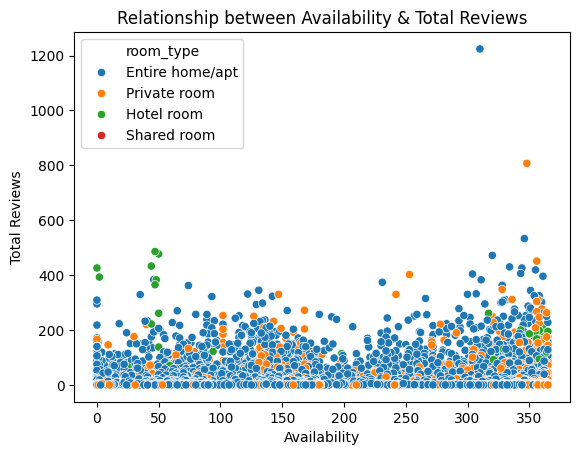

In [66]:
sns.scatterplot(data = df,
                x = 'availability_365',
                y = 'number_of_reviews',
                hue = 'room_type')

plt.title('Relationship between Availability & Total Reviews')
plt.xlabel('Availability')
plt.ylabel('Total Reviews')

plt.show()

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

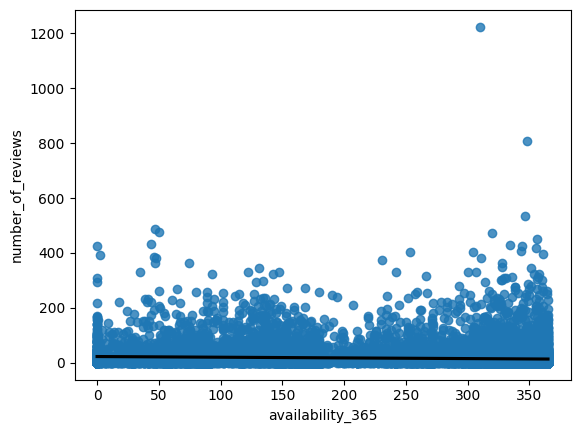

In [67]:
sns.regplot(data = df,
                x = 'availability_365',
                y = 'number_of_reviews', 
                ci=0,
                line_kws={"color": "black"})

In [68]:
#  check data distribution
stats, pval=normaltest(df['number_of_reviews'])
if pval<=0.05:
    print('not normally distributed') #Ha
else: 
    print('normally distributed') #Ho 

not normally distributed


Text(0.5, 1.0, 'Total Reviews Data Distribution')

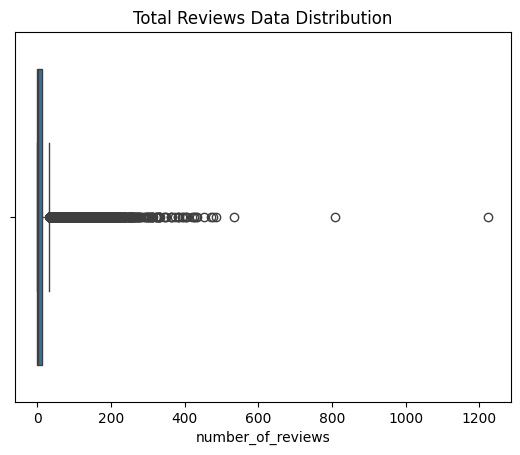

In [69]:
sns.boxplot(data = df,
           x = 'number_of_reviews')

plt.title('Total Reviews Data Distribution')

In [70]:
df['number_of_reviews'].describe()

count    15854.000000
mean        16.654157
std         40.613331
min          0.000000
25%          0.000000
50%          2.000000
75%         13.000000
max       1224.000000
Name: number_of_reviews, dtype: float64

In [71]:
# statistic test: is there any correlation between availability and the reviews number in total
# num vs num, not normal --> spearman
pval = df['availability_365'].corr(df['number_of_reviews'], method='spearman')
if pval <= 0.05:
    print(f'Pval = {pval}. --> Pval <= 0.05 \n Reject Ho, accept Ha')
else:
    print(f'Pval = {pval}. --> Pval > 0.05 \n Failed to reject Ho')

Pval = -0.2640441292022035. --> Pval <= 0.05 
 Reject Ho, accept Ha


Based on the statistic test, the listing's availability and total number of reviews is **weakly correlated**, means that some booking-popular accommodations are also popular by review. 
<br></br>
It is negatively correlated, which proofing that our hyphotesis about the relationship direction is also true (*more popular listings which has lesser booking availability day might correlate with higher number of reviews*). 

#### Availability & Monthly Reviews (`reviews_per_month`)

In [72]:
# Top 10 listings with the most reviews in total
top10_monthly_reviews = df.sort_values(by = 'reviews_per_month', ascending=False).head(10)
top10_monthly_reviews

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3737,20869092,Beautiful One Bedroom Apartment Near Skytrain,116193397,Suchada,Phaya Thai,13.773690,100.540790,Entire home/apt,1571,3,1224,2022-12-16,19.13,1,310,109
11732,51673745,Siamese Sukhumvit 87-1BR Duplex near BTS On Nut,417308207,Siamese Sukhumvit 87,Phra Khanong,13.701551,100.603775,Private room,3461,1,263,2022-12-14,18.31,1,364,246
13177,656164225695350804,1 Bedroom Suite [Silom-Sathorn],340150263,Bandara,Bang Rak,13.725810,100.538228,Private room,3571,1,101,2022-12-14,17.41,18,304,101
6586,31077175,FREE PICK UP⭐BKK AIRPORT/BREAKFAST/PRIVATE DELUXE,158545122,Pailin,Lat Krabang,13.721320,100.764950,Private room,1032,1,807,2022-12-12,16.62,3,348,146
15228,770846996579268639,1BR- BTS Ekamai 300m-Sky infinity Pool&Gym,106371215,Kk,Khlong Toei,13.716772,100.584955,Entire home/apt,2668,1,16,2022-12-26,16.00,4,154,16
14153,720807428519292542,Lovely Condo/Asok/SukhumvitBTS/ Free pool&gym! 2PP,480415786,Aaron,Khlong Toei,13.735460,100.558780,Entire home/apt,1863,1,39,2022-12-23,12.72,9,362,39
14847,754907399713834456,2BR-BTS Ekamai-100inch projector-Infinity Pool Gym,106371215,Kk,Khlong Toei,13.717870,100.584070,Entire home/apt,3676,1,21,2022-12-22,12.60,4,323,21
12895,619882755395668035,7min airport/free pickup/steps to malls/pool&gym,35068115,Shirley,Lat Krabang,13.720327,100.733743,Entire home/apt,1122,1,60,2022-12-25,11.04,2,129,60
14894,755714540112573205,2BR-BTS Ekamai 300m-Sky Infinity Pool&Gym-tub,106371215,Kk,Khlong Toei,13.715660,100.583810,Entire home/apt,4102,1,17,2022-12-25,10.85,4,346,17
14892,755693261908609553,1BR-BTS Ekamai 300m-Sky Infinity Pool&Gym-Sunshine,106371215,Kk,Khlong Toei,13.717020,100.583870,Entire home/apt,2568,1,14,2022-12-27,8.75,4,332,14


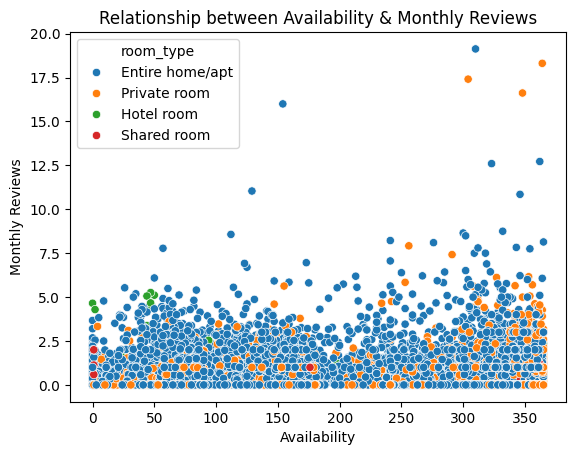

In [73]:
sns.scatterplot(data = df,
                x = 'availability_365',
                y = 'reviews_per_month',
                hue = 'room_type')

plt.title('Relationship between Availability & Monthly Reviews')
plt.xlabel('Availability')
plt.ylabel('Monthly Reviews')

plt.show()

In [74]:
#  check data distribution
stats, pval=normaltest(df['reviews_per_month'])
if pval<=0.05:
    print('not normally distributed') #Ha
else: 
    print('normally distributed') #Ho 

not normally distributed


Text(0.5, 1.0, 'Monthly Reviews Data Distribution')

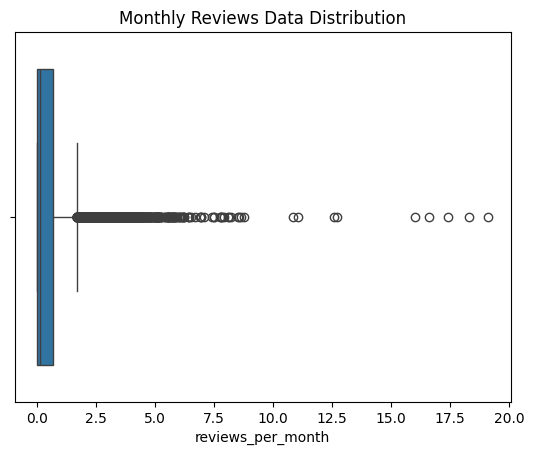

In [75]:
sns.boxplot(data = df,
           x = 'reviews_per_month')

plt.title('Monthly Reviews Data Distribution')

In [76]:
df['reviews_per_month'].describe()

count    15854.000000
mean         0.516178
std          0.952753
min          0.000000
25%          0.000000
50%          0.090000
75%          0.670000
max         19.130000
Name: reviews_per_month, dtype: float64

In [77]:
# statistic test: is there any correlation between availability and the reviews number in total
# num vs num, not normal --> spearman
pval = df['availability_365'].corr(df['reviews_per_month'], method='spearman')
if pval <= 0.05:
    print(f'Pval = {pval}. --> Pval <= 0.05 \n Reject Ho, accept Ha')
else:
    print(f'Pval = {pval}. --> Pval > 0.05 \n Failed to reject Ho')

Pval = -0.25194626013033117. --> Pval <= 0.05 
 Reject Ho, accept Ha


Based on the statistic test, the listing's availability and monthly reviews number is **weakly correlated**, means that some booking-popular accommodations are also popular by review. 
<br></br>
It is negatively correlated, which proofing that our hyphotesis about the relationship direction is also true (*more popular listings which has lesser booking availability day might correlate with higher number of reviews*). 

#### Availability & Total Reviews in the last 12 months (`number_of_reviews_ltm`)

In [78]:
# Top 10 listings with the most reviews in total
top10_total_reviews_ltm = df.sort_values(by = 'number_of_reviews_ltm', ascending=False).head(10)
top10_total_reviews_ltm

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5759,28684287,New* King size bed room - 5-min to BTS,33098670,Paw,Ratchathewi,13.762220,100.540410,Entire home/apt,1140,1,406,2022-12-26,7.83,4,343,325
375,3794264,Sitara Place Serviced Apartment and Hotel,19484732,Sitara,Din Daeng,13.764796,100.564781,Entire home/apt,990,1,302,2022-12-28,3.38,1,360,277
11732,51673745,Siamese Sukhumvit 87-1BR Duplex near BTS On Nut,417308207,Siamese Sukhumvit 87,Phra Khanong,13.701551,100.603775,Private room,3461,1,263,2022-12-14,18.31,1,364,246
3562,19126623,15min BKK Airport/Swimming Pool/Near Mall,128820736,The Cottage,Lat Krabang,13.721040,100.724510,Hotel room,1199,1,168,2022-12-26,2.51,4,356,147
6586,31077175,FREE PICK UP⭐BKK AIRPORT/BREAKFAST/PRIVATE DELUXE,158545122,Pailin,Lat Krabang,13.721320,100.764950,Private room,1032,1,807,2022-12-12,16.62,3,348,146
10533,42627850,"BTS Saphankhwai, ARI, Chatuchak, JJ mall - Studio",333675133,Blu,Phaya Thai,13.790780,100.548480,Entire home/apt,953,1,206,2022-12-13,6.09,4,50,141
8370,36620307,Ratchada Modern Double Room Private Shower Popcorn,275030111,Roy Jungho,Huai Khwang,13.769330,100.574450,Entire home/apt,867,1,250,2022-12-13,6.07,6,364,138
7623,33980217,Family 2 bedroom apartment -5 minutes walk to BTS,1513875,Suchada,Phaya Thai,13.773600,100.540790,Entire home/apt,3214,3,157,2022-12-17,3.54,4,346,124
11850,51048867,Siamese Exclusive Queens-Twin 58 SQM/5min walk MRT,412845925,Siamese Exclusive,Khlong Toei,13.726170,100.561928,Entire home/apt,6492,1,128,2022-12-10,8.14,7,365,118
3737,20869092,Beautiful One Bedroom Apartment Near Skytrain,116193397,Suchada,Phaya Thai,13.773690,100.540790,Entire home/apt,1571,3,1224,2022-12-16,19.13,1,310,109


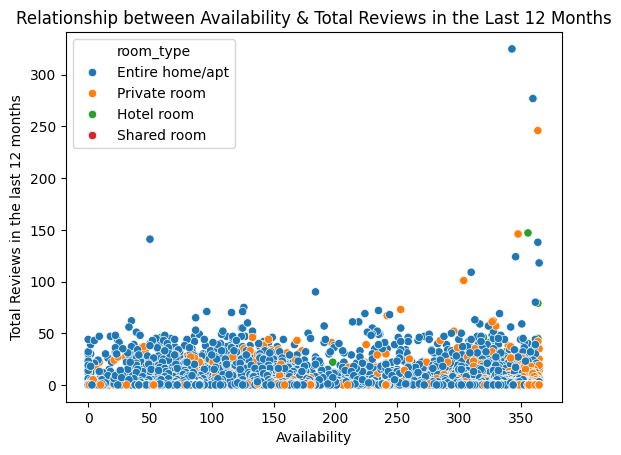

In [79]:
sns.scatterplot(data = df,
                x = 'availability_365',
                y = 'number_of_reviews_ltm',
                hue = 'room_type')

plt.title('Relationship between Availability & Total Reviews in the Last 12 Months')
plt.xlabel('Availability')
plt.ylabel('Total Reviews in the last 12 months')

plt.show()

In [80]:
#  check data distribution
stats, pval=normaltest(df['number_of_reviews_ltm'])
if pval<=0.05:
    print('not normally distributed') #Ha
else: 
    print('normally distributed') #Ho 

not normally distributed


Text(0.5, 1.0, 'Total Reviews in the Last 12 Months Data Distribution')

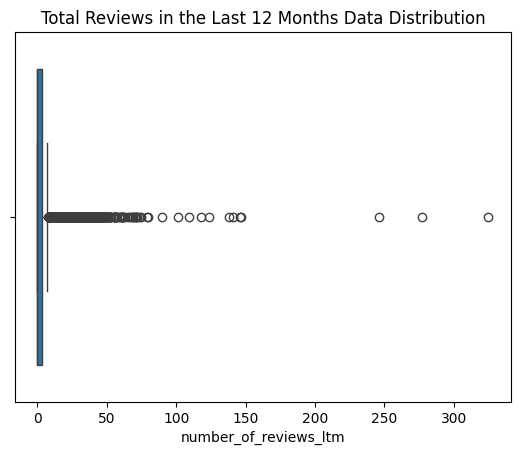

In [81]:
sns.boxplot(data = df,
           x = 'number_of_reviews_ltm')

plt.title('Total Reviews in the Last 12 Months Data Distribution')

In [82]:
df['number_of_reviews_ltm'].describe()

count    15854.000000
mean         3.481519
std          8.916937
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max        325.000000
Name: number_of_reviews_ltm, dtype: float64

In [83]:
# statistic test: is there any correlation between availability and the reviews number in total
# num vs num, not normal --> spearman
pval = df['availability_365'].corr(df['number_of_reviews_ltm'], method='spearman')
if pval <= 0.05:
    print(f'Pval = {pval}. --> Pval <= 0.05 \n Reject Ho, accept Ha')
else:
    print(f'Pval = {pval}. --> Pval > 0.05 \n Failed to reject Ho')

Pval = -0.2128737847306136. --> Pval <= 0.05 
 Reject Ho, accept Ha


Based on the statistic test, the listing's availability and total number of reviews in the last 12 months is **weakly correlated**, means that some booking-popular accommodations are also popular by review. 
<br></br>
It is negatively correlated, which proofing that our hyphotesis about the relationship direction is also true (*more popular listings which has lesser booking availability day might correlate with higher number of reviews*). 

#### **Summary**: Listings Review Popularity 

From the statistic tests, the listing's availability and is **weakly & negatively correlated** to all of the review parameter (the number of total reviews, monthly average reviews, and the recent (12 months) reviews). 
<br></br>
These proofing that *more popular listings which has lesser booking availability day tend to have higher number of reviews*. 

## **Listings Most Popular Room Types**
In this section we will find out which room types are popular amongst customers. 

### Most **Fully Booked** Room Types

In [ ]:
#  full-booked listing room types
rt_fullbooked = pd.DataFrame(available_0['room_type'].value_counts().reset_index())
rt_fullbooked

,room_type,count
0,Entire home/apt,508
1,Private room,251
2,Hotel room,82
3,Shared room,16


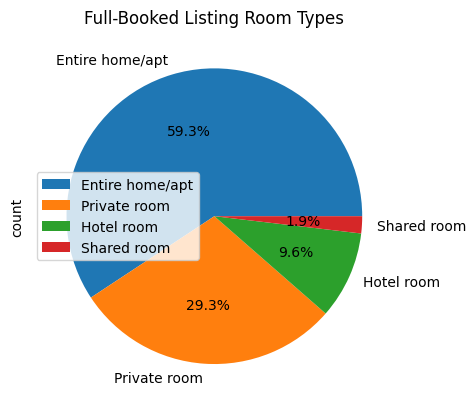

In [ ]:
rt_fullbooked.plot.pie(y = 'count',
                        labels = rt_fullbooked['room_type'],
                        autopct='%1.1f%%',)

plt.title('Full-Booked Listing Room Types Proportion')
plt.show()

### Most **Reviewed** Room Types



#### Based on Total

In [163]:
# total reviews of listing room types
rt_totalrev = df['number_of_reviews'].groupby(by = df['room_type']).sum().sort_values(ascending=False).reset_index()
rt_totalrev

,room_type,number_of_reviews
0,Entire home/apt,197943
1,Private room,50710
2,Hotel room,12700
3,Shared room,2682


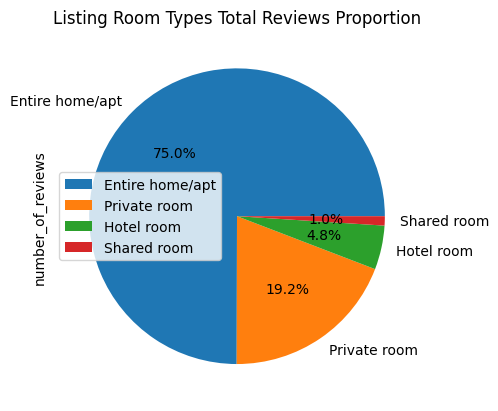

In [164]:
rt_totalrev.plot.pie(y = 'number_of_reviews',
                        labels = rt_fullbooked['room_type'],
                         autopct='%1.1f%%',)

plt.title('Listing Room Types Total Reviews Proportion')
plt.show()

#### Based on Monthly Average

In [158]:
# montly average reviews of listing room types
rt_monthlyrev = df['reviews_per_month'].groupby(by = df['room_type']).mean().sort_values(ascending=False).reset_index()
rt_monthlyrev

,room_type,reviews_per_month
0,Entire home/apt,0.705279
1,Hotel room,0.319831
2,Private room,0.282913
3,Shared room,0.111013


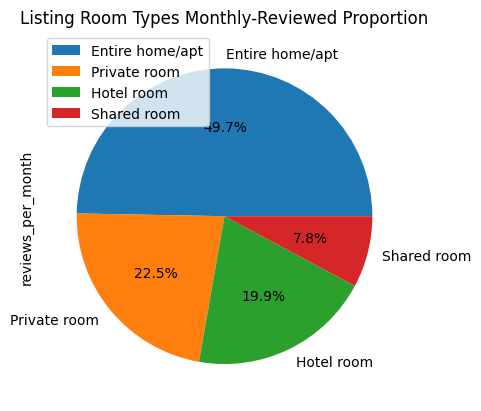

In [162]:
rt_monthlyrev.plot.pie(y = 'reviews_per_month',
                        labels = rt_fullbooked['room_type'],
                        autopct='%1.1f%%',)

plt.title('Listing Room Types Monthly-Reviewed Proportion')
plt.show()

#### Based on Recent (past 12 months)

In [ ]:
# total recent (12 months) reviews of listing room types
rt_12mrev = df['number_of_reviews_ltm'].groupby(by = df['room_type']).sum().sort_values(ascending=False).reset_index()
rt_12mrev

,room_type,number_of_reviews_ltm,percentage
0,Entire home/apt,44535,81.0
1,Private room,9185,17.0
2,Hotel room,1258,2.0
3,Shared room,218,0.0


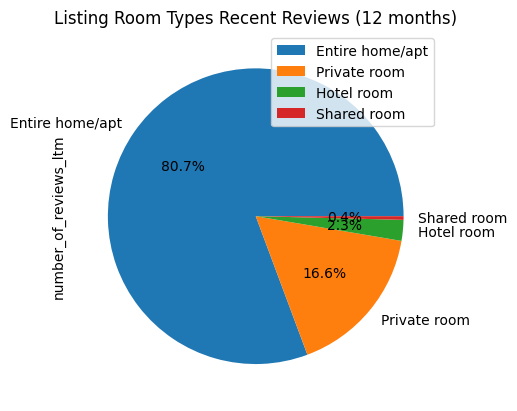

In [166]:
rt_12mrev.plot.pie(y = 'number_of_reviews_ltm',
                        labels = rt_12mrev['room_type'],
                        autopct='%1.1f%%',)

plt.title('Listing Room Types Recent Reviews (12 months)')
plt.show()

### **Summary** : Most popular room type

Based on the availability and reviews, **entire home/apt** type listings are the **most popular** full-booked accommodation. The next in rank are private room, hotel room, and shared room respectively. 

## **Listings Most Popular Neighborhood**

In this section we will find out which neighborhoods are popularly booked and reviewed. 

### Most **Fully Booked** Neighborhood

In [88]:
# bangkok base map
bangkok_map = folium.Map(location = (13.763065192003614, 100.51354575205725))

In [89]:
# availability = 0 listings location
fullbooked = folium.FeatureGroup('Fully Booked').add_to(bangkok_map)
for i in range(available_0['name'].count()):
    folium.Marker(location = (available_0['latitude'][i], available_0['longitude'][i]),
                  tooltip = str(available_0['room_type'][i]),
                  popup = available_0['name'][i],
                  icon = folium.map.Icon(color = 'red')).add_to(fullbooked)
    
folium.LayerControl().add_to(bangkok_map)
bangkok_map

In [167]:
# Top 5 Neighborhood with most full-booked listing
nh_fullbooked = pd.DataFrame(available_0['neighbourhood'].value_counts().reset_index())
nh_fullbooked['percentage'] = [round(i / sum(nh_fullbooked['count']), 2) * 100 for i in nh_fullbooked['count']]
nh_fullbooked.head(5)

,neighbourhood,count,percentage
0,Huai Khwang,153,18.0
1,Vadhana,112,13.0
2,Khlong Toei,74,9.0
3,Phra Nakhon,59,7.0
4,Bang Rak,58,7.0


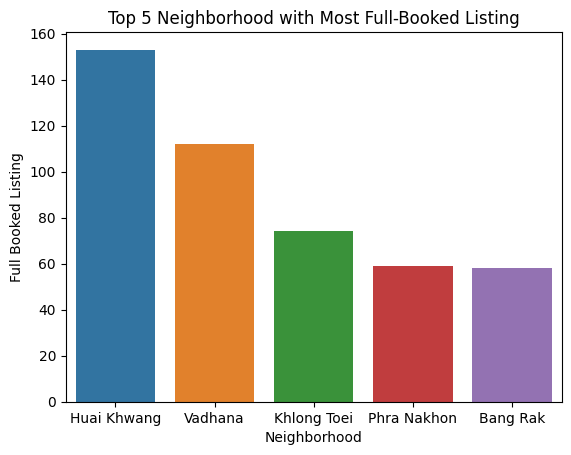

In [168]:
sns.barplot(data = nh_fullbooked.head(5),
            x = 'neighbourhood',
            y = 'count',
            hue = 'neighbourhood')

plt.title('Top 5 Neighborhood with Most Full-Booked Listing')
plt.xlabel('Neighborhood')
plt.ylabel('Full Booked Listing')
plt.show()

### Most **Reviewed** Neighborhood

#### Based on Total

In [170]:
# Top 5 Neighborhood with most total reviews
nh_totalrev = df['number_of_reviews'].groupby(by = df['neighbourhood']).sum().sort_values(ascending=False).reset_index()
nh_totalrev['percentage'] = [round(i / sum(nh_totalrev['number_of_reviews']), 2) * 100 for i in nh_totalrev['number_of_reviews']]
nh_totalrev.head(5)

,neighbourhood,number_of_reviews,percentage
0,Khlong Toei,41281,16.0
1,Vadhana,37415,14.0
2,Sathon,22242,8.0
3,Ratchathewi,20698,8.0
4,Huai Khwang,18145,7.0


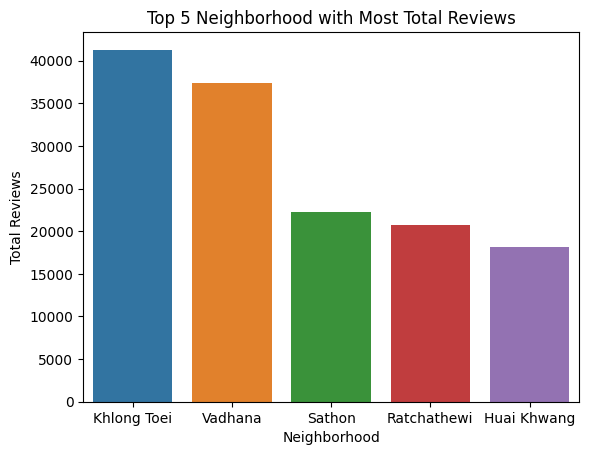

In [176]:
sns.barplot(data = nh_totalrev.head(5),
            x = 'neighbourhood',
            y = 'number_of_reviews',
            hue = 'neighbourhood')

plt.title('Top 5 Neighborhood with Most Total Reviews')
plt.xlabel('Neighborhood')
plt.ylabel('Total Reviews')
plt.show()

#### Based on Monthly Average

In [175]:
# Top 5 Neighborhood with most monthly reviews
nh_monthlyrev = df['reviews_per_month'].groupby(by = df['neighbourhood']).mean().sort_values(ascending=False).reset_index()
nh_monthlyrev['percentage'] = [round(i / sum(nh_monthlyrev['reviews_per_month']), 2) * 100 for i in nh_monthlyrev['reviews_per_month']]
nh_monthlyrev.head(5)

,neighbourhood,reviews_per_month,percentage
0,Khlong Toei,0.865470,6.0
1,Sathon,0.662892,4.0
2,Pom Prap Sattru Phai,0.659675,4.0
3,Vadhana,0.643841,4.0
4,Lat Krabang,0.637181,4.0


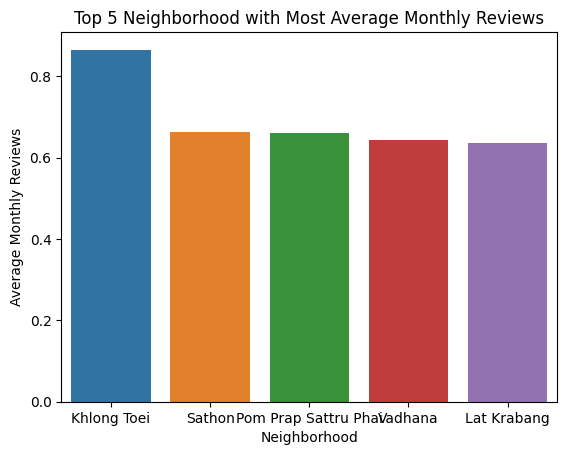

In [177]:
sns.barplot(data = nh_monthlyrev.head(5),
            x = 'neighbourhood',
            y = 'reviews_per_month',
            hue = 'neighbourhood')

plt.title('Top 5 Neighborhood with Most Average Monthly Reviews')
plt.xlabel('Neighborhood')
plt.ylabel('Average Monthly Reviews')
plt.show()

#### Based on Recent (12 months)

In [174]:
# Top 5 Neighborhood with most total recent reviews (12 months)
nh_12mrev = df['number_of_reviews_ltm'].groupby(by = df['neighbourhood']).sum().sort_values(ascending=False).reset_index()
nh_12mrev['percentage'] = [round(i / sum(nh_12mrev['number_of_reviews_ltm']), 2) * 100 for i in nh_12mrev['number_of_reviews_ltm']]
nh_12mrev.head(5)

,neighbourhood,number_of_reviews_ltm,percentage
0,Khlong Toei,13601,25.0
1,Vadhana,9709,18.0
2,Ratchathewi,4455,8.0
3,Bang Rak,3420,6.0
4,Sathon,3232,6.0


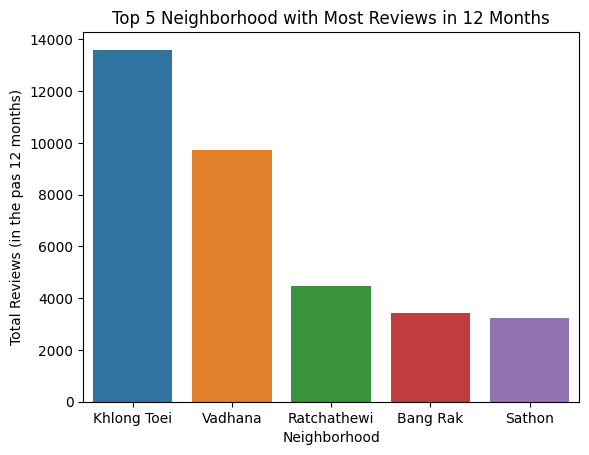

In [179]:
sns.barplot(data = nh_12mrev.head(5),
            x = 'neighbourhood',
            y = 'number_of_reviews_ltm',
            hue = 'neighbourhood')

plt.title('Top 5 Neighborhood with Most Reviews in 12 Months')
plt.xlabel('Neighborhood')
plt.ylabel('Total Reviews (in the pas 12 months)')
plt.show()

### **Summary**: Most popular neighborhood

Based on it's availability and reviews, **Khlong Toei** and **Vadhana** always ranked among the top 5, making them the **most popular** AirBNB listings' **neighborhood** in Bangkok. 

# **Conclusion & Recommendation**

## **Conclusion**

From listings popularity analysis above, based on it's availability and reviews, we found that:
- there are 857 out of 15854 listings that is fully booked for the next 365 days (1 year or 12 months approximately). 
- entire home/apt is the most popular rented room type. 
- Khlong Toei and Vadhana neighborhood are the most popular listing locations. 
- fully booked listings tend to have high number of reviews. 

## **Recommendation**
1. Offer customers a rewards (points, discount voucher, etc) to encourage them to leave a reviews to the listings they have rented. 

Increasing the listings reviews number prospected to give a listing more exposure to the customer that could led to an increase in booking numbers and hopefully extending the profit margin. 